In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load Data

In [48]:
df_train_raw = pd.read_csv('data/train_transaction.csv')
df_test_raw = pd.read_csv('data/test_transaction.csv')

In [49]:
df_raw = pd.concat([df_train_raw, df_test_raw], axis = 0, ignore_index= True)

# Data Exploration

In [50]:
pd.options.display.max_columns = 394
df_raw.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0.0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0.0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [51]:
print('Total number of transactions: {} \nTotal number of Frauds: {}' .format(len(df_raw), np.count_nonzero(df_raw.isFraud)))

Total number of transactions: 1097231 
Total number of Frauds: 527354


In [52]:
print('Amount Paid Total:')
df_raw.TransactionAmt.describe()

Amount Paid Total:


count    1.097231e+06
mean     1.348879e+02
std      2.422407e+02
min      1.800000e-02
25%      4.200000e+01
50%      6.795000e+01
75%      1.250000e+02
max      3.193739e+04
Name: TransactionAmt, dtype: float64

In [53]:
print('Amount Paid Only Fraud:')
df_raw.TransactionAmt[df_raw.isFraud == 1].describe()

Amount Paid Only Fraud:


count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64

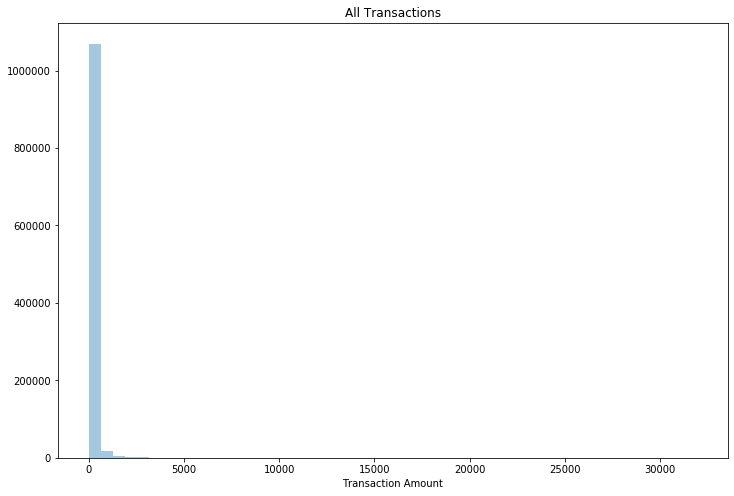

In [54]:
plt.figure(figsize=(12,8))
sns.distplot(df_raw.TransactionAmt, kde=False);
plt.title('All Transactions');
plt.xlabel('Transaction Amount');

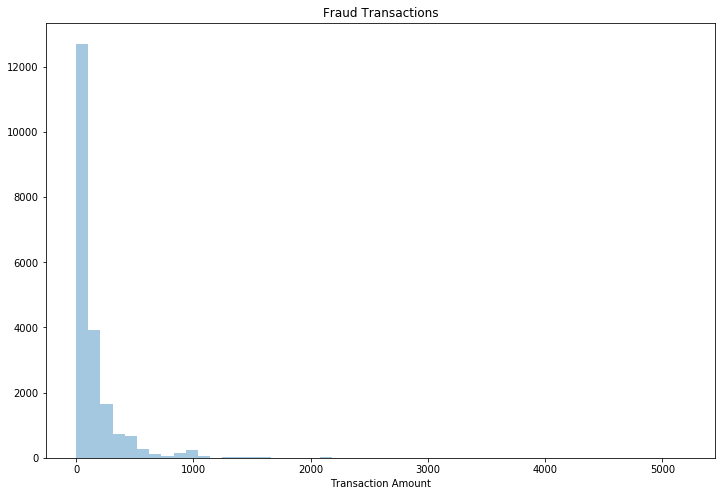

In [55]:
plt.figure(figsize=(12,8))
sns.distplot(df_raw.TransactionAmt[df_raw.isFraud == 1], kde=False);
plt.title('Fraud Transactions');
plt.xlabel('Transaction Amount');

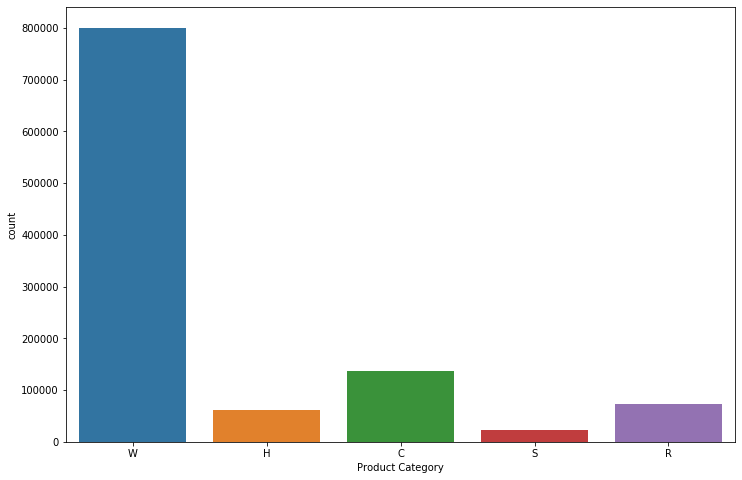

In [56]:
plt.figure(figsize=(12,8))
sns.countplot(df_raw.ProductCD);
plt.xlabel('Product Category');

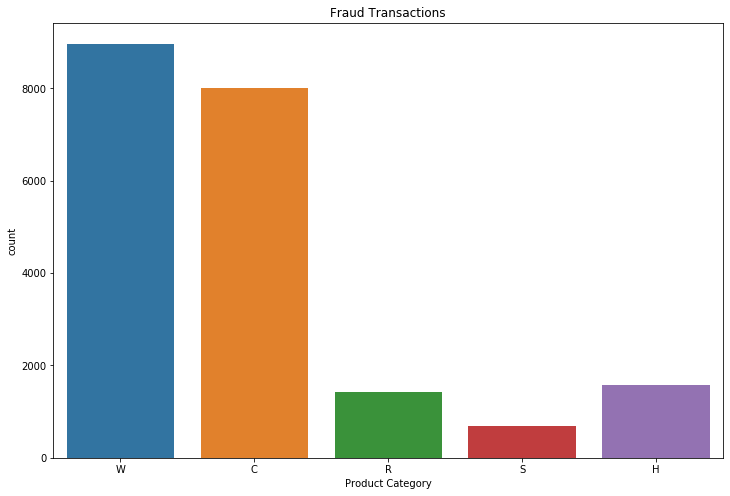

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(df_raw.ProductCD[df_raw.isFraud == 1]);
plt.title('Fraud Transactions');
plt.xlabel('Product Category');

# Pre-Processing

In [58]:
def count_encode(X, categorical_features, normalize=False):
    '''
    Count encoding
    '''
    print('Count encoding: {}'.format(categorical_features))
    X_ = pd.DataFrame()
    for cat_feature in categorical_features:
        X_[cat_feature] = X[cat_feature].astype(
            'object').map(X[cat_feature].value_counts())
        if normalize:
            X_[cat_feature] = X_[cat_feature] / np.max(X_[cat_feature])
    X_ = X_.add_suffix('_count_encoded')
    if normalize:
        X_ = X_.astype(np.float32)
        X_ = X_.add_suffix('_normalized')
    else:
        X_ = X_.astype(np.uint32)
    return X_

In [59]:
df = df_raw.copy()

In [60]:
# Missing Values 

df.card2.fillna(value = 0, inplace = True)
df.card3.fillna(value = 0, inplace = True)
df.card4.fillna(value = "UnknownCard", inplace = True)
df.card5.fillna(value = 0, inplace = True)
df.card6.fillna(value = "UnknownType", inplace = True)


df.addr1.fillna(value = 0, inplace = True)
df.addr2.fillna(value = 0, inplace = True)

df.dist1.fillna(value = 0, inplace = True)
df.dist2.fillna(value = 0, inplace = True)




df.P_emaildomain.fillna(value = "UnknownEmail", inplace = True)
df.R_emaildomain.fillna(value = df.P_emaildomain, inplace = True)

In [61]:
# Missing and categorical 
columns_remove = ['TransactionDT']
for i in range(1,10):
    columns_remove.append('M'+str(i))
    df['M'+str(i)].fillna(value = 'NotGiven', inplace = True)
    if i == 1:
        dummies = pd.get_dummies(df['M'+str(i)], prefix = 'M'+str(i))
    else:
        dummies = pd.concat([dummies, pd.get_dummies(df['M'+str(i)], prefix = 'M'+str(i))], axis = 1)

    
    df['C'+str(i)].fillna(value = 0, inplace = True)

    df['D'+str(i)].fillna(value = -1, inplace = True)
    
    df['V'+str(i)].fillna(value = -1, inplace = True)

for i in range(10,15):
    df['C'+str(i)].fillna(value = 0, inplace = True)

    df['D'+str(i)].fillna(value = -1, inplace = True)
    
    df['V'+str(i)].fillna(value = -1, inplace = True)

for i in range(15,16):
    df['D'+str(i)].fillna(value = -1, inplace = True)
    
    df['V'+str(i)].fillna(value = -1, inplace = True)
    
for i in range(16,340):    
    df['V'+str(i)].fillna(value = -1, inplace = True)


In [62]:
df = pd.concat([df, dummies], axis = 1)
df.drop(columns_remove, axis = 1, inplace = True)

In [63]:
# Classify V Columns
V_Cols = ['V'+str(i) for i in range (1, 340)]
V_Cat = []

for col in V_Cols:
    if df[col].nunique() < 8:
        V_Cat.append(col)

V_dummies = pd.get_dummies(df[V_Cat].astype('int').astype('str'))


df = pd.concat([df, V_dummies], axis = 1)
df.drop(V_Cat, axis = 1, inplace = True)

In [64]:
df.head()

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V2,V3,V4,V5,V6,V7,V8,V9,V11,V13,V15,V16,V17,V18,V19,V20,V22,V23,V24,V25,V26,V27,V28,V30,V31,V32,V33,V34,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V49,V50,V51,V52,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V68,V70,V71,V72,V73,V74,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V91,V92,V93,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V108,V109,V110,V111,V112,V113,V114,V115,V116,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,...,V303,V304,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,M1_F,M1_NotGiven,M1_T,M2_F,M2_NotGiven,M2_T,M3_F,M3_NotGiven,M3_T,M4_M0,M4_M1,M4_M2,M4_NotGiven,M5_F,M5_NotGiven,M5_T,M6_F,M6_NotGiven,M6_T,M7_F,M7_NotGiven,M7_T,M8_F,M8_NotGiven,M8_T,M9_F,M9_NotGiven,M9_T,V1_-1,V1_0,V1_1,V10_-1,V10_0,V10_1,V10_2,V10_3,V10_4,V10_5,V12_-1,V12_0,V12_1,V12_2,V12_3,V12_4,V14_-1,V14_0,V14_1,V21_-1,V21_0,V21_1,V21_2,V21_3,V21_4,V21_5,V29_-1,V29_0,V29_1,V29_2,V29_3,V29_4,V29_5,V35_-1,V35_0,V35_1,V35_2,V35_3,V35_4,V41_-1,V41_0,V41_1,V48_-1,V48_0,V48_1,V48_2,V48_3,V48_4,V48_5,V53_-1,V53_0,V53_1,V53_2,V53_3,V53_4,V53_5,V65_-1,V65_0,V65_1,V69_-1,V69_0,V69_1,V69_2,V69_3,V69_4,V69_5,V75_-1,V75_0,V75_1,V75_2,V75_3,V75_4,V75_5,V88_-1,V88_0,V88_1,V90_-1,V90_0,V90_1,V90_2,V90_3,V90_4,V90_5,V94_-1,V94_0,V94_1,V94_2,V107_-1,V107_0,V107_1,V117_-1,V117_0,V117_1,V117_2,V117_3,V118_-1,V118_0,V118_1,V118_2,V118_3,V119_-1,V119_0,V119_1,V119_2,V119_3,V120_-1,V120_0,V120_1,V120_2,V120_3,V120_4,V121_-1,V121_0,V121_1,V121_2,V121_3,V121_4,V122_-1,V122_0,V122_1,V122_2,V122_3,V122_4,V241_-1,V241_0,V241_1,V241_2,V241_3,V241_4,V241_5,V305_-1,V305_1,V305_2
0,2987000,0.0,68.5,W,13926,0.0,150.0,discover,142.0,credit,315.0,87.0,19.0,0.0,UnknownEmail,UnknownEmail,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,-1.0,13.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,13.0,13.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2987001,0.0,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,0.0,0.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.

In [65]:
#Combining columns card1 card2 card3 card5
df.card1 = df.card1.astype('str')+df.card2.astype('int64').astype('str')+df.card3.astype('int64').astype('str')+df.card5.astype('int64').astype('str')
df.addr1 = df.addr1.astype('int64').astype('str')+df.addr2.astype('int64').astype('str')

In [66]:
# Convert the categorical values to numbers

#cat_features = ["ProductCD", "card1", "card2", "card3", "card4", "card5", "card6"]
cat_features = ['card1', 'addr1']
transformed_df = count_encode(df, cat_features, normalize = True)

Count encoding: ['card1', 'addr1']


In [67]:
df = pd.concat([df, pd.get_dummies(df.ProductCD), pd.get_dummies(df.card4), pd.get_dummies(df.card6), pd.get_dummies(df.addr2, prefix = 'addr2'), 
                pd.get_dummies(df.P_emaildomain, prefix = 'P_'), pd.get_dummies(df.R_emaildomain,  prefix = 'R_')], axis = 1)

df = pd.concat([df, transformed_df], axis = 1)

In [68]:
#Normalizing Values
df.TransactionAmt = df.TransactionAmt/np.max(df.TransactionAmt)
df.dist1 = df.dist1/np.max(df.dist1)
df.dist2 = df.dist2/np.max(df.dist2)

In [69]:
df.drop(['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2','P_emaildomain', 'R_emaildomain'], axis = 1, inplace = True)

In [70]:
#pd.options.display.max_columns = 394
df.head()

,TransactionID,isFraud,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V2,V3,V4,V5,V6,V7,V8,V9,V11,V13,V15,V16,V17,V18,V19,V20,V22,V23,V24,V25,V26,V27,V28,V30,V31,V32,V33,V34,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V49,V50,V51,V52,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V68,V70,V71,V72,V73,V74,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V91,V92,V93,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V108,V109,V110,V111,V112,V113,V114,V115,V116,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,...,addr2_30.0,addr2_31.0,addr2_32.0,addr2_33.0,addr2_34.0,addr2_35.0,addr2_36.0,addr2_37.0,addr2_38.0,addr2_39.0,addr2_40.0,addr2_41.0,addr2_42.0,addr2_43.0,addr2_44.0,addr2_45.0,addr2_46.0,addr2_47.0,addr2_48.0,addr2_49.0,addr2_50.0,addr2_51.0,addr2_52.0,addr2_53.0,addr2_54.0,addr2_55.0,addr2_56.0,addr2_57.0,addr2_58.0,addr2_59.0,addr2_60.0,addr2_61.0,addr2_62.0,addr2_63.0,addr2_64.0,addr2_65.0,addr2_66.0,addr2_67.0,addr2_68.0,addr2_69.0,addr2_70.0,addr2_71.0,addr2_72.0,addr2_73.0,addr2_74.0,addr2_75.0,addr2_76.0,addr2_77.0,addr2_78.0,addr2_79.0,addr2_80.0,addr2_81.0,addr2_82.0,addr2_83.0,addr2_84.0,addr2_85.0,addr2_86.0,addr2_87.0,addr2_88.0,addr2_89.0,addr2_90.0,addr2_91.0,addr2_92.0,addr2_93.0,addr2_94.0,addr2_95.0,addr2_96.0,addr2_97.0,addr2_98.0,addr2_99.0,addr2_100.0,addr2_101.0,addr2_102.0,P__UnknownEmail,P__aim.com,P__anonymous.com,P__aol.com,P__att.net,P__bellsouth.net,P__cableone.net,P__centurylink.net,P__cfl.rr.com,P__charter.net,P__comcast.net,P__cox.net,P__earthlink.net,P__embarqmail.com,P__frontier.com,P__frontiernet.net,P__gmail,P__gmail.com,P__gmx.de,P__hotmail.co.uk,P__hotmail.com,P__hotmail.de,P__hotmail.es,P__hotmail.fr,P__icloud.com,P__juno.com,P__live.com,P__live.com.mx,P__live.fr,P__mac.com,P__mail.com,P__me.com,P__msn.com,P__netzero.com,P__netzero.net,P__optonline.net,P__outlook.com,P__outlook.es,P__prodigy.net.mx,P__protonmail.com,P__ptd.net,P__q.com,P__roadrunner.com,P__rocketmail.com,P__sbcglobal.net,P__sc.rr.com,P__scranton.edu,P__servicios-ta.com,P__suddenlink.net,P__twc.com,P__verizon.net,P__web.de,P__windstream.net,P__yahoo.co.jp,P__yahoo.co.uk,P__yahoo.com,P__yahoo.com.mx,P__yahoo.de,P__yahoo.es,P__yahoo.fr,P__ymail.com,R__UnknownEmail,R__aim.com,R__anonymous.com,R__aol.com,R__att.net,R__bellsouth.net,R__cableone.net,R__centurylink.net,R__cfl.rr.com,R__charter.net,R__comcast.net,R__cox.net,R__earthlink.net,R__embarqmail.com,R__frontier.com,R__frontiernet.net,R__gmail,R__gmail.com,R__gmx.de,R__hotmail.co.uk,R__hotmail.com,R__hotmail.de,R__hotmail.es,R__hotmail.fr,R__icloud.com,R__juno.com,R__live.com,R__live.com.mx,R__live.fr,R__mac.com,R__mail.com,R__me.com,R__msn.com,R__netzero.com,R__netzero.net,R__optonline.net,R__outlook.com,R__outlook.es,R__prodigy.net.mx,R__protonmail.com,R__ptd.net,R__q.com,R__roadrunner.com,R__rocketmail.com,R__sbcglobal.net,R__sc.rr.com,R__scranton.edu,R__servicios-ta.com,R__suddenlink.net,R__twc.com,R__verizon.net,R__web.de,R__windstream.net,R__yahoo.co.jp,R__yahoo.co.uk,R__yahoo.com,R__yahoo.com.mx,R__yahoo.de,R__yahoo.es,R__yahoo.fr,R__ymail.com,card1_count_encoded_normalized,addr1_count_encoded_normalized
0,2987000,0.0,0.002145,0.001847,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,-1.0,13.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,13.0,13.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0

# Modeling

In [71]:
# Separating train and test datasets
df_train = df[:len(df_train_raw)]
df_test = df[len(df_train_raw):]

In [72]:
X = df_train.drop(['isFraud','TransactionID'], axis = 1)
targets = df_train.isFraud
X_test = df_test.drop(['isFraud','TransactionID'], axis = 1)

In [73]:
tot_num = len(targets)
Fraud_num = np.count_nonzero(targets)
nonFraud_num = tot_num- Fraud_num
weights = {0: 1/Fraud_num*tot_num/2, 1: 1/nonFraud_num*tot_num/2}

In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(X,targets, test_size = 0.2, random_state = 42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((472432, 740), (118108, 740), (472432,), (118108,))

In [75]:
model_RF = RandomForestClassifier(n_jobs = -1, random_state = 42, class_weight=weights)

In [76]:
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 14.28979335043314,
                                     1: 0.5181293507195412},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [77]:
model_RF.score(X_valid, y_valid)

0.9787143969925831

In [78]:
model_RF.score(X_valid, y_valid)

0.9787143969925831

# Test Dataset

In [79]:
#pd.options.display.max_columns = 394
X_test.head()

,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V2,V3,V4,V5,V6,V7,V8,V9,V11,V13,V15,V16,V17,V18,V19,V20,V22,V23,V24,V25,V26,V27,V28,V30,V31,V32,V33,V34,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V49,V50,V51,V52,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V68,V70,V71,V72,V73,V74,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V91,V92,V93,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V108,V109,V110,V111,V112,V113,V114,V115,V116,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,...,addr2_30.0,addr2_31.0,addr2_32.0,addr2_33.0,addr2_34.0,addr2_35.0,addr2_36.0,addr2_37.0,addr2_38.0,addr2_39.0,addr2_40.0,addr2_41.0,addr2_42.0,addr2_43.0,addr2_44.0,addr2_45.0,addr2_46.0,addr2_47.0,addr2_48.0,addr2_49.0,addr2_50.0,addr2_51.0,addr2_52.0,addr2_53.0,addr2_54.0,addr2_55.0,addr2_56.0,addr2_57.0,addr2_58.0,addr2_59.0,addr2_60.0,addr2_61.0,addr2_62.0,addr2_63.0,addr2_64.0,addr2_65.0,addr2_66.0,addr2_67.0,addr2_68.0,addr2_69.0,addr2_70.0,addr2_71.0,addr2_72.0,addr2_73.0,addr2_74.0,addr2_75.0,addr2_76.0,addr2_77.0,addr2_78.0,addr2_79.0,addr2_80.0,addr2_81.0,addr2_82.0,addr2_83.0,addr2_84.0,addr2_85.0,addr2_86.0,addr2_87.0,addr2_88.0,addr2_89.0,addr2_90.0,addr2_91.0,addr2_92.0,addr2_93.0,addr2_94.0,addr2_95.0,addr2_96.0,addr2_97.0,addr2_98.0,addr2_99.0,addr2_100.0,addr2_101.0,addr2_102.0,P__UnknownEmail,P__aim.com,P__anonymous.com,P__aol.com,P__att.net,P__bellsouth.net,P__cableone.net,P__centurylink.net,P__cfl.rr.com,P__charter.net,P__comcast.net,P__cox.net,P__earthlink.net,P__embarqmail.com,P__frontier.com,P__frontiernet.net,P__gmail,P__gmail.com,P__gmx.de,P__hotmail.co.uk,P__hotmail.com,P__hotmail.de,P__hotmail.es,P__hotmail.fr,P__icloud.com,P__juno.com,P__live.com,P__live.com.mx,P__live.fr,P__mac.com,P__mail.com,P__me.com,P__msn.com,P__netzero.com,P__netzero.net,P__optonline.net,P__outlook.com,P__outlook.es,P__prodigy.net.mx,P__protonmail.com,P__ptd.net,P__q.com,P__roadrunner.com,P__rocketmail.com,P__sbcglobal.net,P__sc.rr.com,P__scranton.edu,P__servicios-ta.com,P__suddenlink.net,P__twc.com,P__verizon.net,P__web.de,P__windstream.net,P__yahoo.co.jp,P__yahoo.co.uk,P__yahoo.com,P__yahoo.com.mx,P__yahoo.de,P__yahoo.es,P__yahoo.fr,P__ymail.com,R__UnknownEmail,R__aim.com,R__anonymous.com,R__aol.com,R__att.net,R__bellsouth.net,R__cableone.net,R__centurylink.net,R__cfl.rr.com,R__charter.net,R__comcast.net,R__cox.net,R__earthlink.net,R__embarqmail.com,R__frontier.com,R__frontiernet.net,R__gmail,R__gmail.com,R__gmx.de,R__hotmail.co.uk,R__hotmail.com,R__hotmail.de,R__hotmail.es,R__hotmail.fr,R__icloud.com,R__juno.com,R__live.com,R__live.com.mx,R__live.fr,R__mac.com,R__mail.com,R__me.com,R__msn.com,R__netzero.com,R__netzero.net,R__optonline.net,R__outlook.com,R__outlook.es,R__prodigy.net.mx,R__protonmail.com,R__ptd.net,R__q.com,R__roadrunner.com,R__rocketmail.com,R__sbcglobal.net,R__sc.rr.com,R__scranton.edu,R__servicios-ta.com,R__suddenlink.net,R__twc.com,R__verizon.net,R__web.de,R__windstream.net,R__yahoo.co.jp,R__yahoo.co.uk,R__yahoo.com,R__yahoo.com.mx,R__yahoo.de,R__yahoo.es,R__yahoo.fr,R__ymail.com,card1_count_encoded_normalized,addr1_count_encoded_normalized
590540,0.001000,0.000097,0.0,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,-1.0,-1.0,-1.0,-1.0,418.0,203.0,-1.0,-1.0,-1.0,409.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [80]:
X_test.fillna(value=0, inplace = True)
X_test.isnull().sum()

TransactionAmt                    0
dist1                             0
dist2                             0
C1                                0
C2                                0
                                 ..
R__yahoo.es                       0
R__yahoo.fr                       0
R__ymail.com                      0
card1_count_encoded_normalized    0
addr1_count_encoded_normalized    0
Length: 740, dtype: int64

In [81]:
y_pred = model_RF.predict_proba(X_test)

In [82]:
submission_df = pd.DataFrame(columns=['TransactionID']+['isFraud'])

In [83]:
submission_df['TransactionID']= list(df_test.TransactionID)
submission_df['isFraud'] = y_pred[:, 1]

In [84]:
submission_df.to_csv('Submission/Submission6.csv', index = False)